**Data Collection and Preparation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

In [ ]:

df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})



/tmp/ipython-input-3-713266315.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


In [ ]:
df['Gender'].value_counts()


,count
Gender,


In [ ]:
df['Dataset'] = df['Dataset'].replace(2, 0)


**Handling Outliers**

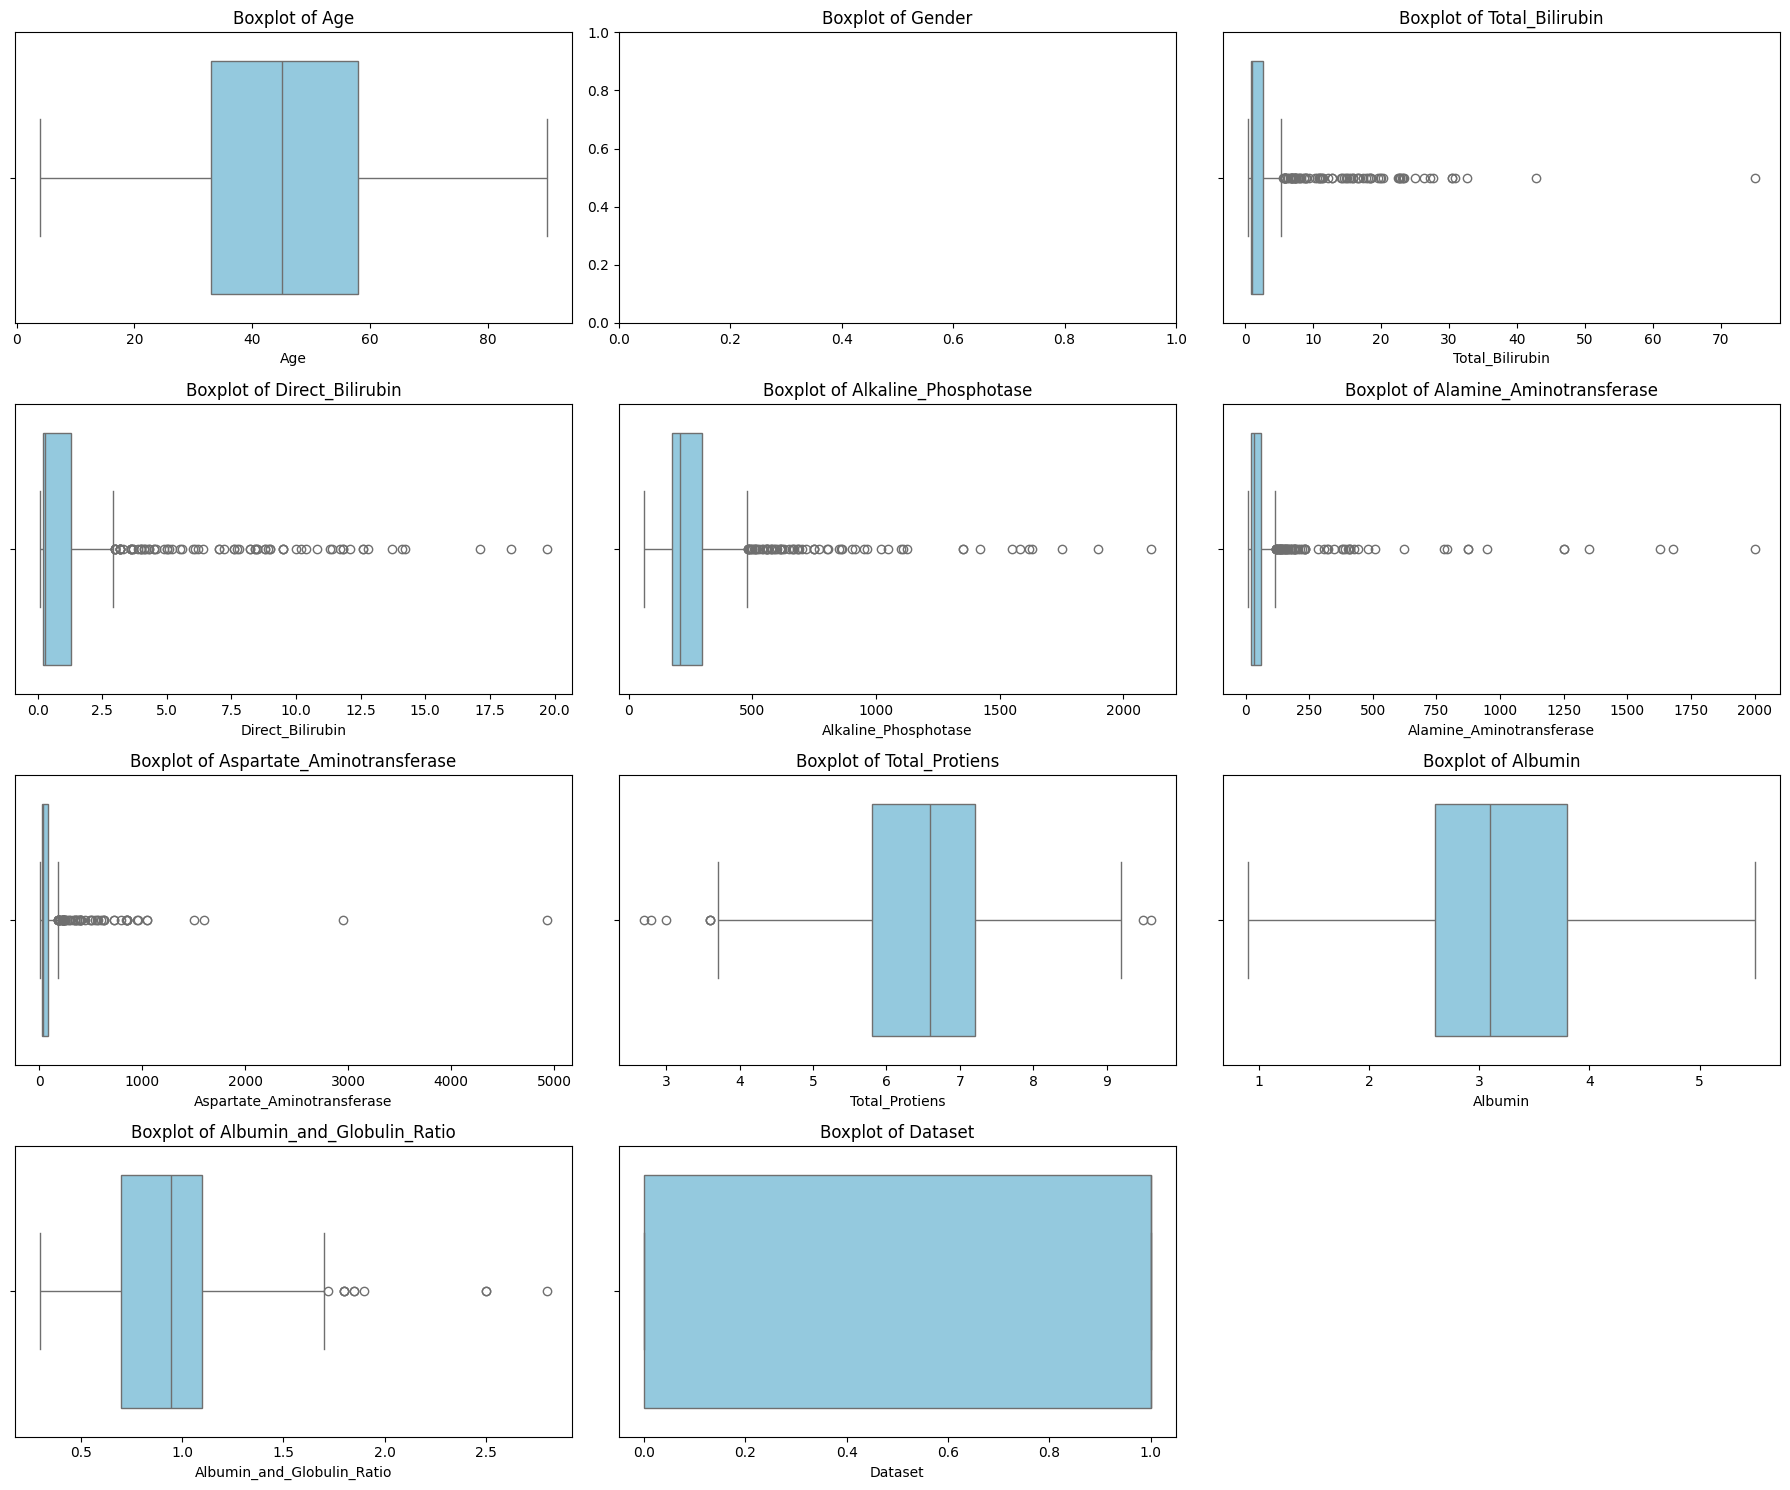

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


plt.figure(figsize=(18, 15))

for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) // 3) + 1, 3, i + 1)


    sns.boxplot(data=df[[col]].dropna(), x=col, color='skyblue')

    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


In [ ]:
# ✅ Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# ✅ Correct column names (check these match your dataset)
outlier_columns = [
    'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
    'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
    'Total_Protein', 'Albumin', 'Albumin_and_Globulin_Ratio'
]

# ✅ Loop through and remove outliers for each column
for col in outlier_columns:
    if col in df.columns:  # This avoids KeyErrors
        df = remove_outliers_iqr(df, col)

# ✅ Check resulting dataset size
print("Data shape after removing outliers:", df.shape)



Data shape after removing outliers: (128, 11)


**Train and Test(Split)**

In [ ]:


X = df.drop('Dataset', axis=1)
y = df['Dataset']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (227, 10)
Testing set shape: (57, 10)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split features and label
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

print("Training data after normalization:")
print(X_train_scaled.head())

Training data after normalization:
        Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  0.761194     NaN         0.333333               0.0              0.490323   
1  0.447761     NaN         1.000000               0.0              0.529032   
2  0.552239     NaN         0.666667               0.0              0.458065   
3  0.731343     NaN         0.666667               0.0              0.354839   
4  0.716418     NaN         0.333333               0.0              0.464516   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                     0.200                       0.125        0.457627   
1                     0.700                       0.350        0.610169   
2                     0.625                       0.250        0.305085   
3                     0.300                       0.550        0.118644   
4                     0.325                       0.450        0.525424   

    Albumin  Albumin_and_Globulin

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


**Exploratory Data Analysis**

In [ ]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,128.000000,0.0,128.000000,1.280000e+02,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,44.828125,NaN,0.767188,2.000000e-01,182.257812,25.914062,26.226562,6.644531,3.325000,0.987688,0.515625
std,14.764348,NaN,0.082395,4.736988e-16,33.189327,9.092722,9.563064,1.083361,0.702863,0.224062,0.501719
min,17.000000,NaN,0.600000,2.000000e-01,110.000000,10.000000,10.000000,3.700000,1.600000,0.500000,0.000000
25%,33.750000,NaN,0.700000,2.000000e-01,158.000000,19.750000,19.000000,6.000000,2.900000,0.800000,0.000000
50%,45.000000,NaN,0.800000,2.000000e-01,182.000000,25.000000,24.000000,6.700000,3.300000,1.000000,1.000000
75%,54.250000,NaN,0.800000,2.000000e-01,201.250000,31.000000,32.000000,7.300000,3.900000,1.100000,1.000000
max,84.000000,NaN,0.900000,2.000000e-01,265.000000,50.000000,51.000000,9.600000,4.700000,1.550000,1.000000


Shape of data: (128, 11)

Columns:
 Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

Missing values:
 Age                             0
Gender                        128
Total_Bilirubin                 0
Direct_Bilirubin                0
Alkaline_Phosphotase            0
Alamine_Aminotransferase        0
Aspartate_Aminotransferase      0
Total_Protiens                  0
Albumin                         0
Albumin_and_Globulin_Ratio      0
Dataset                         0
dtype: int64

Data Types:
 Age                             int64
Gender                        float64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens      

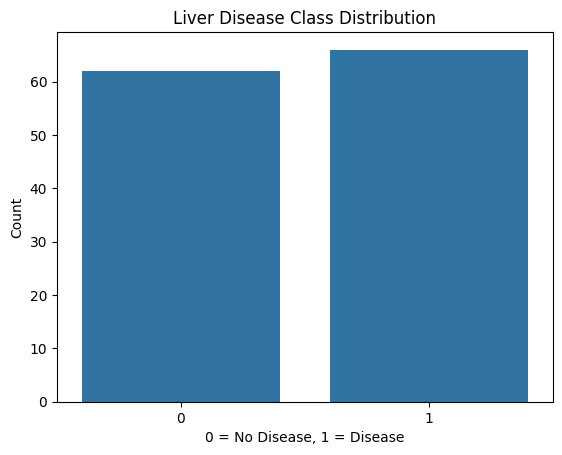

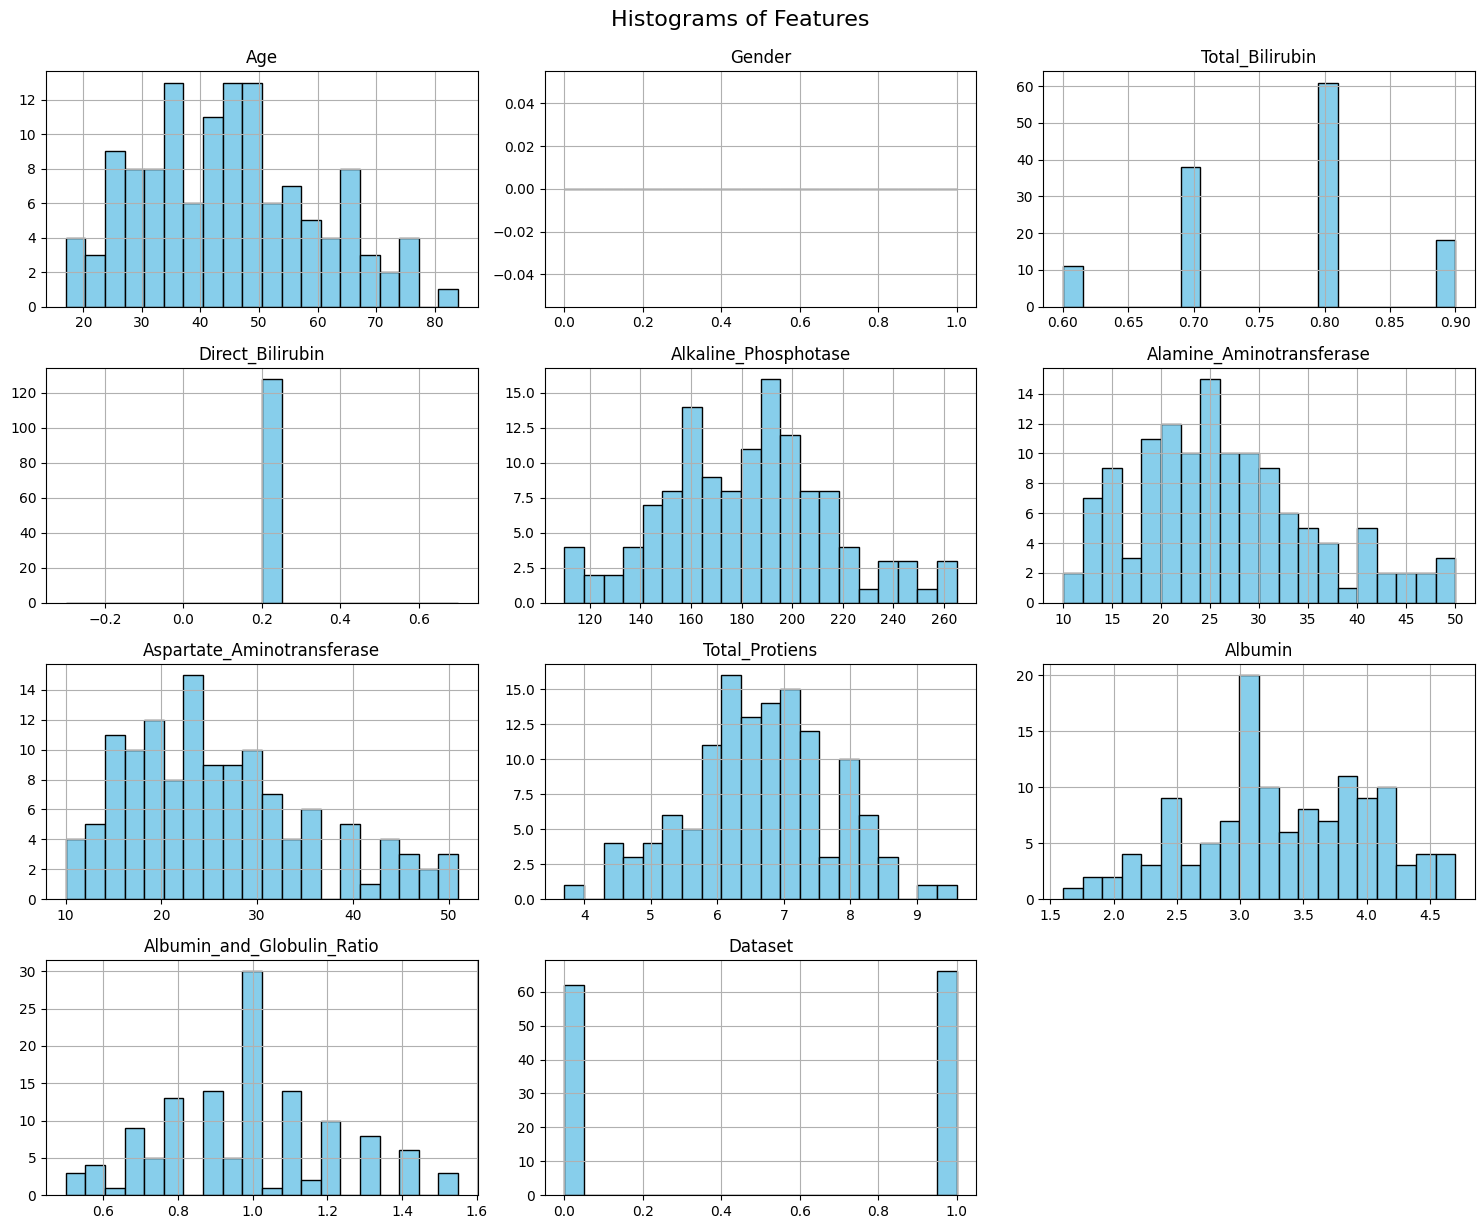

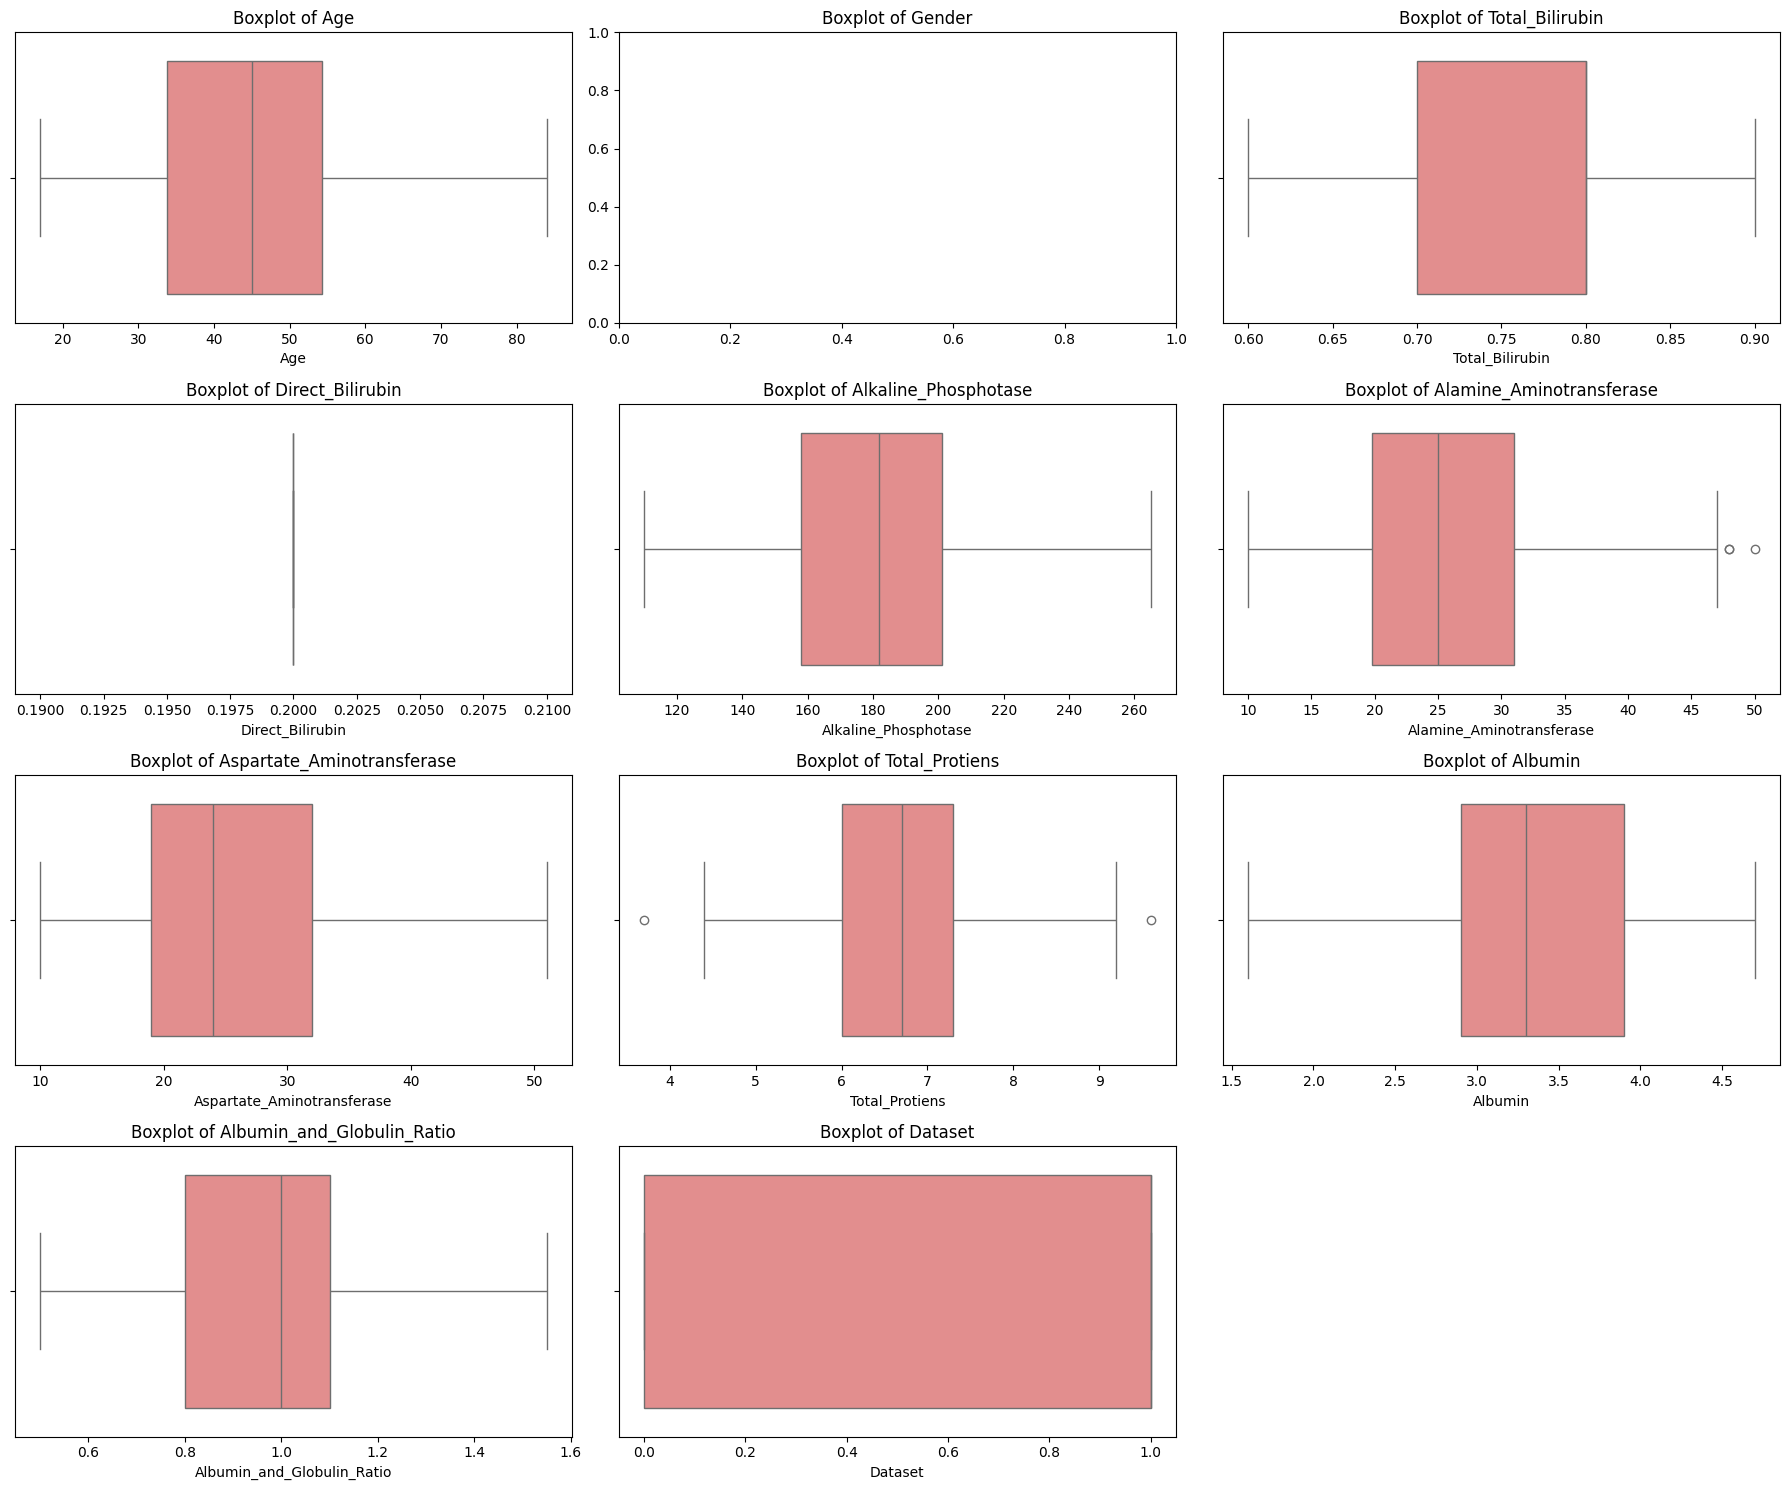

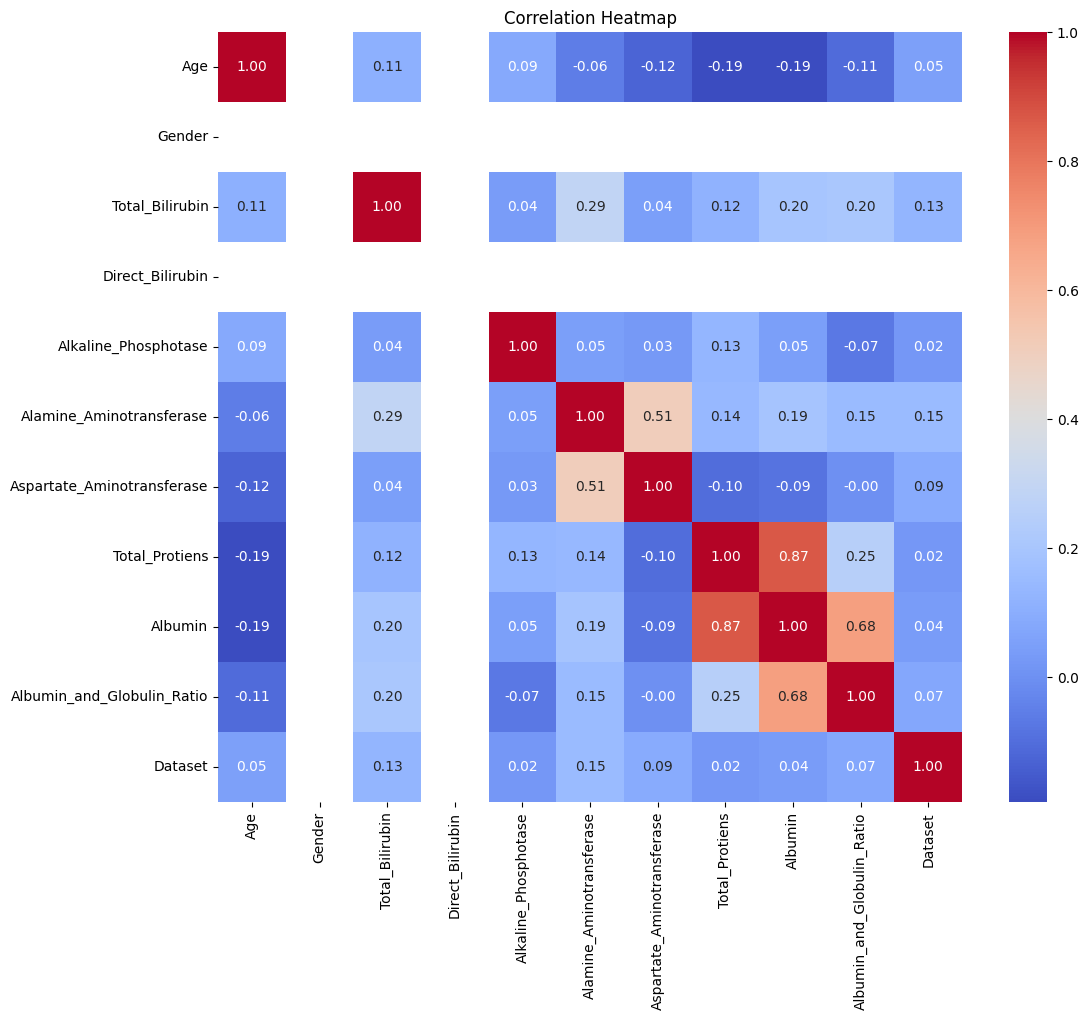

In [ ]:
print("Shape of data:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

df['Dataset'] = df['Dataset'].replace(2, 0)

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

sns.countplot(data=df, x='Dataset')
plt.title("Liver Disease Class Distribution")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.show()

df.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.suptitle("Histograms of Features", fontsize=16, y=1.02)
plt.show()

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(18, 15))

for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) // 3) + 1, 3, i + 1)

    # Drop NaNs to prevent error
    sns.boxplot(x=df[col].dropna(), color='lightcoral')

    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



**Model Building**

In [ ]:


import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('indian_liver_patient.csv')

# Clean and preprocess
df['Dataset'] = df['Dataset'].replace(2, 0)  # 2 -> 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

# Features and label
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalize features
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Fill any remaining NaNs
X_train_scaled.fillna(X_train_scaled.mean(), inplace=True)
X_test_scaled.fillna(X_test_scaled.mean(), inplace=True)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 {name} 🔹")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Track best model
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

# Save best model
joblib.dump(best_model, 'liver_model.pkl')
print(f"\n✅ Best Model: {best_model_name} (Accuracy: {best_accuracy:.2f}) saved as liver_model.pkl")


/tmp/ipython-input-46-3346492355.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)



🔹 Logistic Regression 🔹
Accuracy: 0.7094017094017094
Confusion Matrix:
 [[ 1 33]
 [ 1 82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.03      0.06        34
           1       0.71      0.99      0.83        83

    accuracy                           0.71       117
   macro avg       0.61      0.51      0.44       117
weighted avg       0.65      0.71      0.60       117


🔹 Random Forest 🔹
Accuracy: 0.717948717948718
Confusion Matrix:
 [[ 8 26]
 [ 7 76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.24      0.33        34
           1       0.75      0.92      0.82        83

    accuracy                           0.72       117
   macro avg       0.64      0.58      0.57       117
weighted avg       0.68      0.72      0.68       117


🔹 K-Nearest Neighbors 🔹
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[12 22]
 [17 66]]
Classification Report:
      

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.717948717948718


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 4 26]
 [ 7 80]]
              precision    recall  f1-score   support

           0       0.36      0.13      0.20        30
           1       0.75      0.92      0.83        87

    accuracy                           0.72       117
   macro avg       0.56      0.53      0.51       117
weighted avg       0.65      0.72      0.67       117



**Model Saving**

In [ ]:
import joblib

joblib.dump(model, 'liver_model.pkl')

print("Model saved as liver_model.pkl")


Model saved as liver_model.pkl


In [ ]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle

# Define the model pipeline (ensure this cell is executed before saving)
model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# You might need to fit the model here if you haven't already in a previous cell
# model.fit(X_train, y_train) # Uncomment and run this if the model hasn't been fitted

joblib.dump(model, 'liver_model.pkl')

print("Model saved as liver_model.pkl")

Model saved as liver_model.pkl


In [ ]:
from google.colab import files
files.download('liver_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics
print("Model Performance (Before Tuning):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Performance (Before Tuning):
Accuracy: 0.717948717948718
Precision: 0.7547169811320755
Recall: 0.9195402298850575
F1 Score: 0.8290155440414507
Confusion Matrix:
 [[ 4 26]
 [ 7 80]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.13      0.20        30
           1       0.75      0.92      0.83        87

    accuracy                           0.72       117
   macro avg       0.56      0.53      0.51       117
weighted avg       0.65      0.72      0.67       117



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create model
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
# Predict using the tuned model
y_pred_tuned = best_rf.predict(X_test_scaled)

print("Model Performance (After Tuning):")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("F1 Score:", f1_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))


Model Performance (After Tuning):
Accuracy: 0.7350427350427351
Precision: 0.7413793103448276
Recall: 0.9885057471264368
F1 Score: 0.8472906403940886
Confusion Matrix:
 [[ 0 30]
 [ 1 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.74      0.99      0.85        87

    accuracy                           0.74       117
   macro avg       0.37      0.49      0.42       117
weighted avg       0.55      0.74      0.63       117



In [ ]:
import pickle
with open('best_liver_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)


In [ ]:
from google.colab import files
files.download('best_liver_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
!pip install scikit-learn==1.7.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 63.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [18]:
# train_model.py
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('indian_liver_patient.csv')

# Rename unnamed column if exists
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Preprocessing
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male=1, Female=0
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
df['Dataset'] = df['Dataset'].replace(2, 0)  # 1 = Liver Disease, 0 = No Disease

X = df.drop('Dataset', axis=1)
y = df['Dataset']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save model
with open('liver_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model trained and saved as liver_model.pkl")


/tmp/ipython-input-18-2290406587.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)


✅ Model trained and saved as liver_model.pkl
